In [65]:
import os
import torch
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import cv2
from alive_progress import alive_bar
import time
from PIL import Image as im 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn import metrics
from sklearn.metrics import r2_score, confusion_matrix

In [66]:
os.listdir()

['princess',
 'Disney Better-Copy1.ipynb',
 '.DS_Store',
 'pooh_Extra',
 'test',
 'Disney.ipynb',
 'Untitled.ipynb',
 'Disney_Character_Recognize.ipynb',
 'Trial_Images',
 'pdf Files',
 'disney_model.keras',
 'olaf_Extra',
 'donald_Extra',
 'Disney Better.ipynb',
 'train',
 'X.npy',
 'Y.npy',
 '.ipynb_checkpoints',
 'pumba_Extra',
 'mickey_Extra']

In [67]:
os.listdir("princess")

['Cinderella',
 'ariel',
 'arura',
 '.DS_Store',
 'tiana',
 'ruponzel',
 'merida',
 'belle',
 'Snow White',
 'elsa',
 'jasmine',
 'anna']

In [68]:
os.listdir("test")

['pumba', 'donald', '.DS_Store', 'mickey', 'pooh', 'minion', 'olaf']

In [69]:
click = 1
n = 100
try:
    Y = np.load("Y.npy")
    X = np.load("X.npy")
except:
    click = 0

In [70]:
if click == 0:
    X = []
    X_Files = []
    Y = []
    for i in tqdm(range(0, len(os.listdir("princess")))):
        if os.listdir("princess")[i] != ".DS_Store":
            folder = "princess/" + os.listdir("princess")[i]
            for j in range(0, len(os.listdir(folder))):
                if os.listdir(folder)[j] != ".DS_Store":
                    X_Files.append(folder + "/" + os.listdir(folder)[j])
                    Y.append(os.listdir("princess")[i])
    for i in tqdm(range(0, len(os.listdir("test")))):
        if os.listdir("test")[i] != ".DS_Store":
            folder = "test/" + os.listdir("test")[i]
            for j in range(0, len(os.listdir(folder))):
                if os.listdir(folder)[j] != ".DS_Store":
                    X_Files.append(folder + "/" + os.listdir(folder)[j])
                    Y.append(os.listdir("test")[i])
    for i in tqdm(range(0, len(os.listdir("train")))):
        if os.listdir("train")[i] != ".DS_Store":
            folder = "train/" + os.listdir("train")[i]
            for j in range(0, len(os.listdir(folder))):
                if os.listdir(folder)[j] != ".DS_Store":
                    X_Files.append(folder + "/" + os.listdir(folder)[j])
                    Y.append(os.listdir("train")[i])

In [71]:
def rescale(img, n):
    image = cv2.imread(img)
    image = cv2.resize(image, [n, n])
    return image

In [72]:
if click == 0:
    for i in tqdm(range(0, 3000)):
        X.append(rescale(X_Files[i], n))

In [73]:
if click == 0:
    for i in tqdm(range(3000, 6000)):
        X.append(rescale(X_Files[i], n))

In [74]:
if click == 0:
    for i in tqdm(range(6000, len(X_Files))):
        X.append(rescale(X_Files[i], n))

In [75]:
X[0].shape

(100, 100, 3)

In [76]:
len(Y)

8698

In [77]:
if click == 0:
    np.save("X.npy", X)
    np.save("Y.npy", Y)

In [78]:
np.unique(Y, return_counts=True)

(array(['Cinderella', 'Snow White', 'anna', 'ariel', 'arura', 'belle',
        'donald', 'elsa', 'jasmine', 'merida', 'mickey', 'minion', 'olaf',
        'pooh', 'pumba', 'ruponzel', 'tiana'], dtype='<U10'),
 array([615, 384, 328, 304, 377, 280, 580, 597, 500, 378, 523, 781, 686,
        677, 701, 519, 468]))

In [79]:
ld = LabelEncoder()
ld.fit(np.unique(Y))
Y_t = ld.transform(Y)

In [80]:
def trans(n, N):
    a = []
    for i in range(0, N):
        if i == n:
            a.append(1)
        else:
            a.append(0)
    return a

In [81]:
Y = []
for i in range(0, len(Y_t)):
    Y.append(trans(Y_t[i], len(np.unique(Y_t))))
Y = np.array(Y)
X = np.array(X)

In [82]:
Y_t

array([ 0,  0,  0, ..., 12, 12, 12])

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_t, test_size=0.37)

In [84]:
Y_train

array([ 8,  0,  0, ...,  6, 10, 10])

In [85]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.AvgPool2D((2, 2)))
model.add(layers.BatchNormalization(synchronized=True))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.AvgPool2D((2, 2)))
model.add(layers.BatchNormalization(synchronized=True))
model.add(layers.Conv2D(128, (2, 2), activation='relu'))
model.add(layers.AvgPool2D((2, 2)))
model.add(layers.BatchNormalization(synchronized=True))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.AvgPool2D((2, 2)))
model.add(layers.BatchNormalization(synchronized=True))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization(synchronized=True))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(17, activation = 'softmax'))

In [86]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 average_pooling2d_4 (Averag  (None, 49, 49, 32)       0         
 ePooling2D)                                                     
                                                                 
 batch_normalization_5 (Batc  (None, 49, 49, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 average_pooling2d_5 (Averag  (None, 23, 23, 64)       0         
 ePooling2D)                                                     
                                                      

In [87]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=30, 
                    validation_data=(X_test, Y_test))

Epoch 1/30


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


172/172 [==============================] - 51s 282ms/step - loss: 1.7512 - accuracy: 0.4895 - val_loss: 2.3868 - val_accuracy: 0.3787
Epoch 2/30
172/172 [==============================] - 48s 281ms/step - loss: 1.1505 - accuracy: 0.6749 - val_loss: 1.2438 - val_accuracy: 0.6462
Epoch 3/30
172/172 [==============================] - 48s 280ms/step - loss: 0.9371 - accuracy: 0.7253 - val_loss: 1.1987 - val_accuracy: 0.6552
Epoch 4/30
172/172 [==============================] - 50s 291ms/step - loss: 0.7960 - accuracy: 0.7677 - val_loss: 0.8811 - val_accuracy: 0.7589
Epoch 5/30
172/172 [==============================] - 47s 276ms/step - loss: 0.6502 - accuracy: 0.8105 - val_loss: 0.8118 - val_accuracy: 0.7683
Epoch 6/30
172/172 [==============================] - 47s 274ms/step - loss: 0.5724 - accuracy: 0.8335 - val_loss: 1.0003 - val_accuracy: 0.7266
Epoch 7/30
172/172 [==============================] - 47s 272ms/step - loss: 0.4479 - accuracy: 0.8739 - val_loss: 0.8337 - val_accuracy: 0.7

In [88]:
model.save("disney_model.keras")

In [89]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis = 1)
y_true = Y_test

101/101 [==============================] - 5s 52ms/step


In [90]:
y_true

array([11, 12, 12, ..., 12,  6, 10])

In [91]:
y_pred

array([11, 14, 12, ..., 12,  6, 10])

In [92]:
Y_pred

array([[5.8725221e-12, 8.3538038e-11, 1.0980458e-12, ..., 1.2318399e-12,
        2.1467124e-10, 6.0514582e-10],
       [2.8255670e-07, 4.8053931e-03, 7.6110851e-08, ..., 8.6801177e-01,
        4.1966917e-04, 1.5463691e-05],
       [1.1354584e-06, 1.9129497e-05, 9.0365468e-08, ..., 5.4941024e-04,
        8.9755190e-07, 3.0650466e-05],
       ...,
       [1.3275377e-10, 8.4087320e-11, 4.0081928e-14, ..., 3.4545227e-09,
        9.7684499e-11, 6.3373848e-11],
       [5.4262096e-14, 4.4797922e-11, 4.6235921e-11, ..., 2.6674225e-09,
        1.0993353e-11, 1.2068844e-14],
       [2.7370012e-08, 4.4295888e-07, 4.1681103e-10, ..., 2.8071938e-07,
        1.2486106e-07, 1.9911026e-08]], dtype=float32)

In [93]:
r2_score(y_true, y_pred)

0.6058944197364262

In [94]:
correct = 0
total = 0
for i in range(0, len(y_pred)):
  if y_true[i] == y_pred[i]:
    correct += 1
  total += 1
round(correct/total, 4) * 100

82.82000000000001

In [95]:
cm = confusion_matrix(y_true, y_pred)
for i in range(0, len(cm[0])):
  cm[i] = cm[i] * 100 / float(sum(cm[i]))

cm

array([[81,  2,  0,  0,  3,  2,  0,  3,  1,  0,  0,  0,  0,  0,  0,  2,
         0],
       [ 0, 82,  0,  0,  0,  0,  0,  1,  6,  0,  0,  0,  0,  0,  3,  0,
         1],
       [ 2,  0, 71,  0,  0,  0,  0, 20,  0,  1,  0,  0,  0,  0,  1,  0,
         0],
       [ 0,  0,  0, 72,  2,  6,  0,  0,  1,  1,  0,  0,  0,  0,  1, 10,
         1],
       [11,  2,  0,  1, 70,  1,  0,  1,  1,  0,  0,  1,  1,  0,  0,  4,
         0],
       [ 2,  8,  0,  1,  0, 64,  0,  2,  3,  3,  0,  1,  0,  0,  3,  2,
         9],
       [ 0,  1,  0,  0,  0,  0, 85,  0,  1,  0,  2,  1,  2,  1,  0,  0,
         0],
       [ 3,  0,  8,  0,  0,  0,  0, 82,  0,  0,  0,  0,  2,  0,  0,  0,
         0],
       [ 2,  1,  0,  0,  0,  0,  1,  1, 81,  0,  2,  1,  1,  0,  2,  0,
         2],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  0, 84,  0,  0,  0,  0,  6,  0,
         3],
       [ 0,  0,  0,  0,  1,  0,  4,  0,  0,  0, 87,  1,  1,  0,  3,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0, 92,  0,  0,  

In [96]:
ar = []
for i in range(0, len(np.unique(Y_t))):
    ar.append(i)
dl = ld.inverse_transform(ar)
dl

array(['Cinderella', 'Snow White', 'anna', 'ariel', 'arura', 'belle',
       'donald', 'elsa', 'jasmine', 'merida', 'mickey', 'minion', 'olaf',
       'pooh', 'pumba', 'ruponzel', 'tiana'], dtype='<U10')

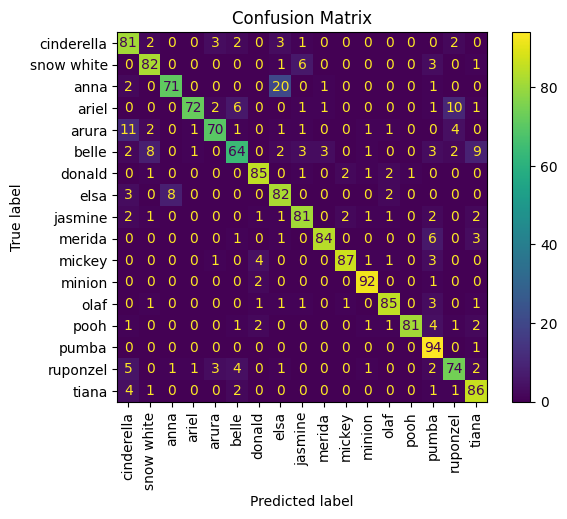

In [97]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = np.char.lower(dl))
cm_display.plot()
plt.title("Confusion Matrix")
plt.xticks(rotation=90)
plt.show()

In [98]:
def prediction(filename):
    X = rescale(filename, n)
    x = np.array([X])
    y = model.predict(x)[0]
    arr = np.argsort(-y)
    arr = arr[:5]
    index = arr[0]
    f1 = cv2.imread(filename)
    y_t = y[arr] * 100
    arr = ld.inverse_transform(arr)
    ind_arr = np.where(Y_train == index)[0]
    ind = ind_arr[random.randint(0, len(ind_arr) - 1)]
    figure2 = X_train[ind]
    figure2 = cv2.resize(figure2, [f1.shape[0], f1.shape[1]])
    D = dict(zip(np.char.upper(arr), y_t))
    plt.figure()

    #subplot(r,c) provide the no. of rows and columns
    f, axarr = plt.subplots(1,2) 
    axarr[0].imshow(f1)
    axarr[1].imshow(figure2)
    plt.show()
    return D

1/1 [==============================] - 0s 24ms/step


<Figure size 640x480 with 0 Axes>

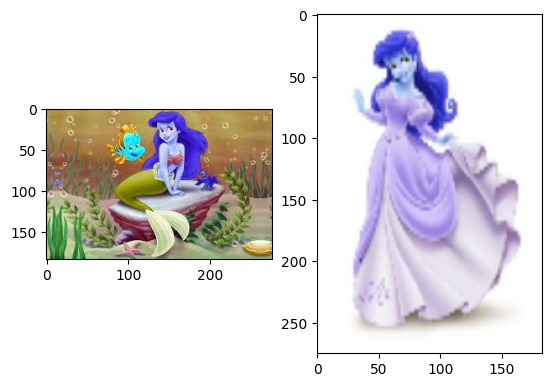

{'ARIEL': 99.83813,
 'SNOW WHITE': 0.058562785,
 'ARURA': 0.047559563,
 'RUPONZEL': 0.039469272,
 'TIANA': 0.008933663}

In [99]:
prediction("Trial_Images/ariel.jpeg")

1/1 [==============================] - 0s 23ms/step


<Figure size 640x480 with 0 Axes>

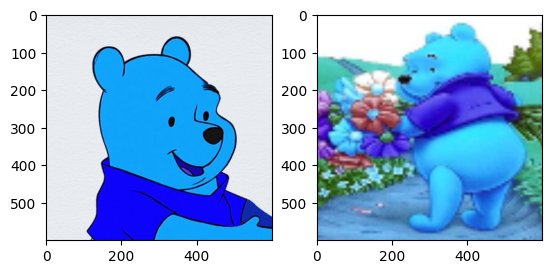

{'POOH': 89.855484,
 'BELLE': 5.614988,
 'CINDERELLA': 2.3744278,
 'MINION': 1.2522603,
 'PUMBA': 0.8050861}

In [100]:
prediction("Trial_Images/Winnie.jpg")

1/1 [==============================] - 0s 22ms/step


<Figure size 640x480 with 0 Axes>

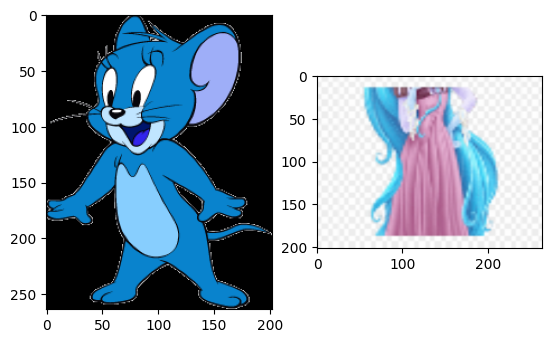

{'RUPONZEL': 38.144848,
 'CINDERELLA': 29.153786,
 'BELLE': 11.249409,
 'MINION': 8.762645,
 'PUMBA': 4.90245}

In [101]:
prediction("Trial_Images/Jerry.jpg")

1/1 [==============================] - 0s 23ms/step


<Figure size 640x480 with 0 Axes>

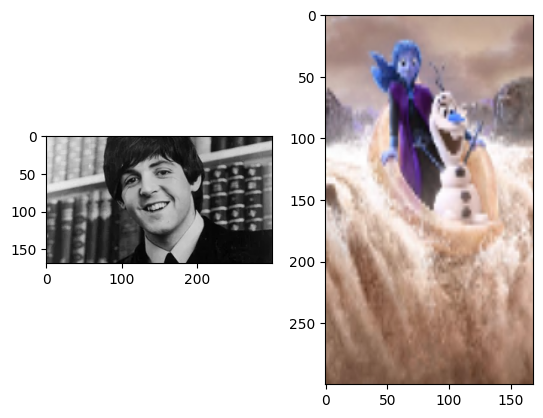

{'OLAF': 97.524765,
 'SNOW WHITE': 2.167002,
 'CINDERELLA': 0.123363,
 'ELSA': 0.09769785,
 'ANNA': 0.037925746}

In [102]:
prediction("Trial_Images/Paul_young.jpg")

1/1 [==============================] - 0s 21ms/step


<Figure size 640x480 with 0 Axes>

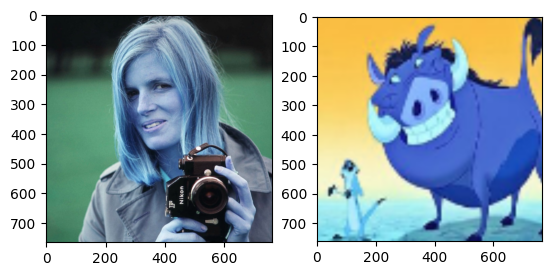

{'PUMBA': 66.50509,
 'POOH': 33.060596,
 'DONALD': 0.1781317,
 'MINION': 0.15830636,
 'TIANA': 0.055786002}

In [103]:
prediction("Trial_Images/linda_mccartney.jpeg")

1/1 [==============================] - 0s 24ms/step


<Figure size 640x480 with 0 Axes>

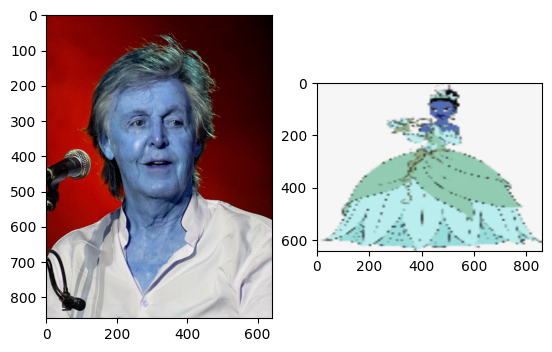

{'TIANA': 53.239845,
 'BELLE': 31.803244,
 'RUPONZEL': 5.6201053,
 'CINDERELLA': 4.0840006,
 'ANNA': 4.0513062}

In [104]:
prediction("Trial_Images/Paul_New.jpg")

1/1 [==============================] - 0s 23ms/step


<Figure size 640x480 with 0 Axes>

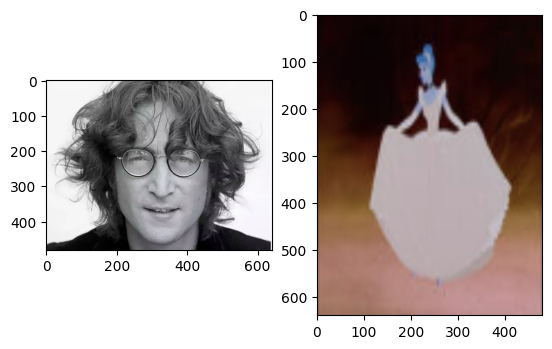

{'CINDERELLA': 94.49928,
 'SNOW WHITE': 4.696231,
 'ARURA': 0.63359344,
 'JASMINE': 0.072410725,
 'MICKEY': 0.0503901}

In [105]:
prediction("Trial_Images/John_Lennon.jpg")

1/1 [==============================] - 0s 21ms/step


<Figure size 640x480 with 0 Axes>

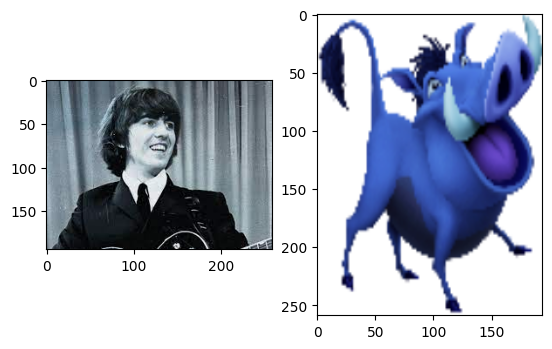

{'PUMBA': 38.540134,
 'SNOW WHITE': 23.764944,
 'OLAF': 20.532549,
 'ARURA': 6.0570297,
 'MICKEY': 3.7108927}

In [106]:
prediction("Trial_Images/George_Young.jpeg")

1/1 [==============================] - 0s 22ms/step


<Figure size 640x480 with 0 Axes>

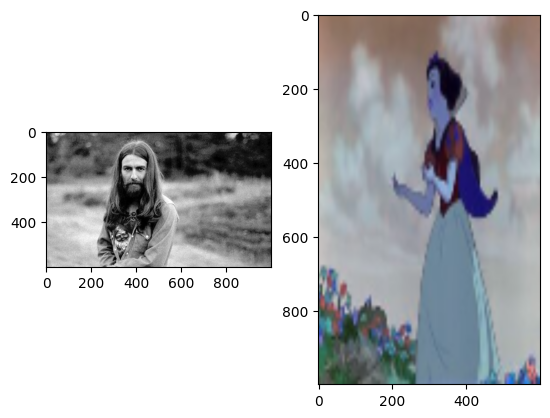

{'SNOW WHITE': 95.514435,
 'ARURA': 2.785774,
 'CINDERELLA': 1.02982,
 'JASMINE': 0.41003647,
 'BELLE': 0.09860814}

In [107]:
prediction("Trial_Images/George_Old.jpeg")

1/1 [==============================] - 0s 22ms/step


<Figure size 640x480 with 0 Axes>

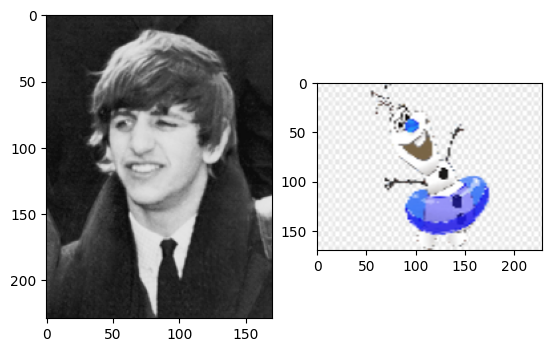

{'OLAF': 99.818855,
 'ELSA': 0.08781609,
 'SNOW WHITE': 0.07332216,
 'CINDERELLA': 0.0062345834,
 'MICKEY': 0.0027429536}

In [108]:
prediction("Trial_Images/Ringo_Young.png")

1/1 [==============================] - 0s 22ms/step


<Figure size 640x480 with 0 Axes>

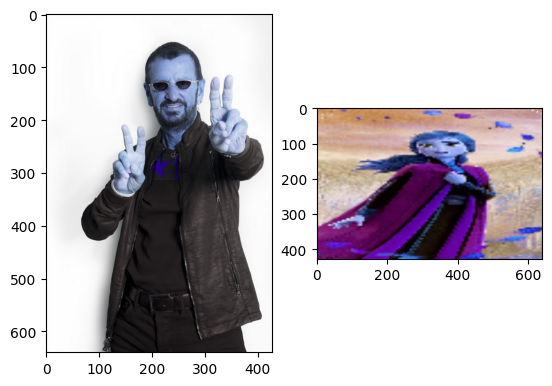

{'ANNA': 41.359573,
 'ELSA': 41.309734,
 'MERIDA': 10.452212,
 'MICKEY': 2.620785,
 'OLAF': 1.4524236}

In [109]:
prediction("Trial_Images/Ringo_Old.jpeg")

1/1 [==============================] - 0s 23ms/step


<Figure size 640x480 with 0 Axes>

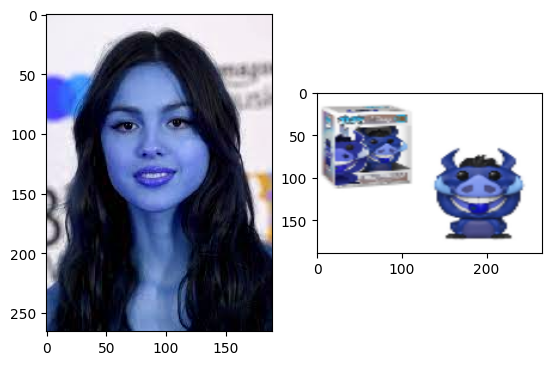

{'PUMBA': 82.66071,
 'JASMINE': 13.039829,
 'BELLE': 2.0171063,
 'TIANA': 1.1457952,
 'ANNA': 0.82907975}

In [110]:
prediction("Trial_Images/Olivia.jpeg")

1/1 [==============================] - 0s 21ms/step


<Figure size 640x480 with 0 Axes>

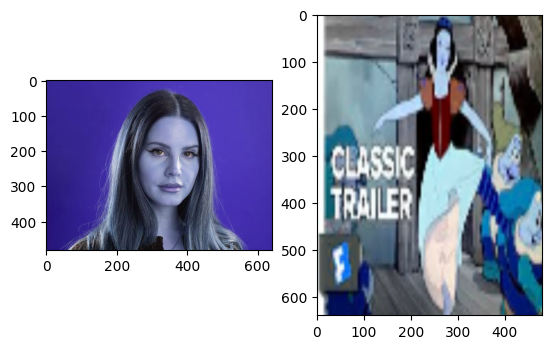

{'SNOW WHITE': 99.92539,
 'MERIDA': 0.05410409,
 'BELLE': 0.0069627627,
 'ANNA': 0.0053413208,
 'ARURA': 0.0038587397}

In [111]:
prediction("Trial_Images/Lana.jpeg")

1/1 [==============================] - 0s 22ms/step


<Figure size 640x480 with 0 Axes>

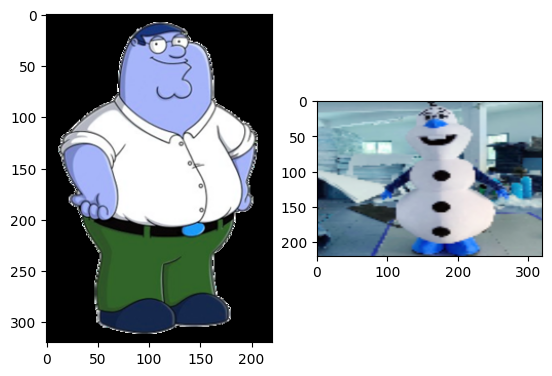

{'OLAF': 91.67156,
 'PUMBA': 7.3608203,
 'TIANA': 0.587396,
 'MINION': 0.14698584,
 'CINDERELLA': 0.0951947}

In [112]:
prediction("Trial_Images/peter.png")

1/1 [==============================] - 0s 22ms/step


<Figure size 640x480 with 0 Axes>

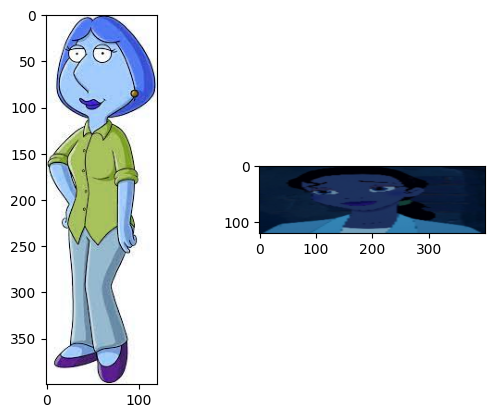

{'TIANA': 88.890854,
 'BELLE': 7.940466,
 'SNOW WHITE': 1.4675581,
 'RUPONZEL': 0.8854265,
 'PUMBA': 0.16671635}

In [113]:
prediction("Trial_Images/Lois.jpeg")

1/1 [==============================] - 0s 21ms/step


<Figure size 640x480 with 0 Axes>

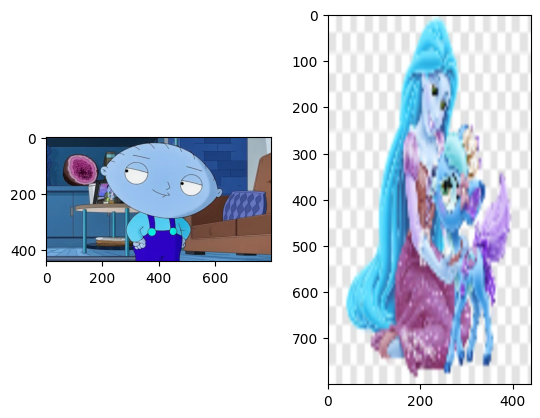

{'RUPONZEL': 37.240265,
 'BELLE': 16.128023,
 'ANNA': 16.094362,
 'ARURA': 15.021608,
 'SNOW WHITE': 4.4245195}

In [114]:
prediction("Trial_Images/stewie.png")

1/1 [==============================] - 0s 22ms/step


<Figure size 640x480 with 0 Axes>

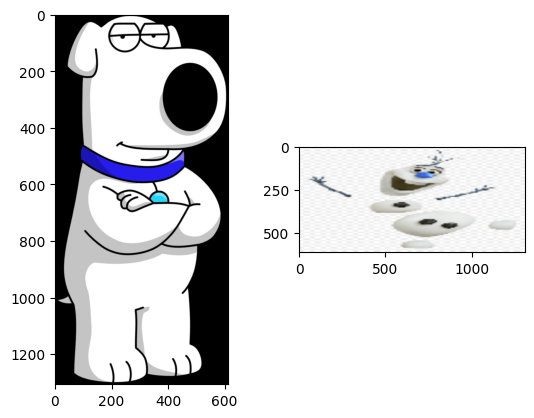

{'OLAF': 86.220474,
 'DONALD': 9.795991,
 'POOH': 2.9685502,
 'MICKEY': 0.88051826,
 'RUPONZEL': 0.06975701}

In [115]:
prediction("Trial_Images/brian.jpg")

1/1 [==============================] - 0s 22ms/step


<Figure size 640x480 with 0 Axes>

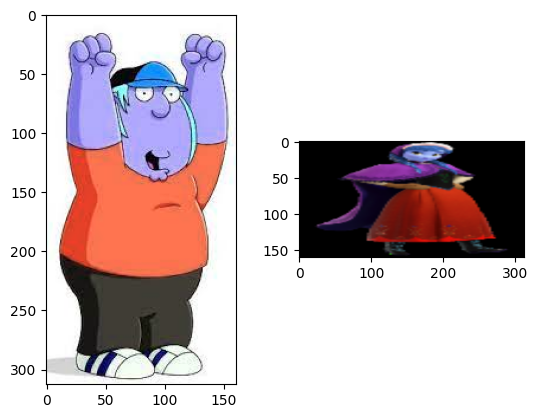

{'ANNA': 81.479485,
 'CINDERELLA': 9.032785,
 'ELSA': 6.923217,
 'BELLE': 1.9147521,
 'SNOW WHITE': 0.3375054}

In [116]:
prediction("Trial_Images/chris.jpeg")

1/1 [==============================] - 0s 22ms/step


<Figure size 640x480 with 0 Axes>

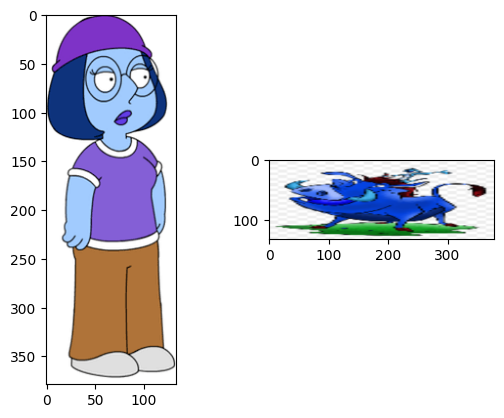

{'PUMBA': 31.674349,
 'SNOW WHITE': 23.328577,
 'ANNA': 10.581805,
 'ARURA': 8.811811,
 'JASMINE': 6.5508084}

In [117]:
prediction("Trial_Images/meg.png")

1/1 [==============================] - 0s 23ms/step


<Figure size 640x480 with 0 Axes>

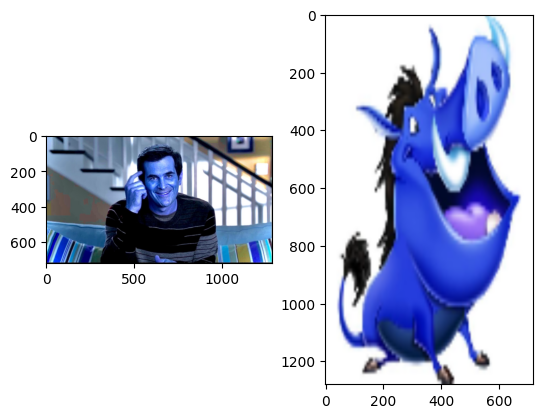

{'PUMBA': 99.9458,
 'ANNA': 0.03237157,
 'SNOW WHITE': 0.013811064,
 'TIANA': 0.005823507,
 'JASMINE': 0.0012478334}

In [118]:
prediction("Trial_Images/phil.jpg")

1/1 [==============================] - 0s 21ms/step


<Figure size 640x480 with 0 Axes>

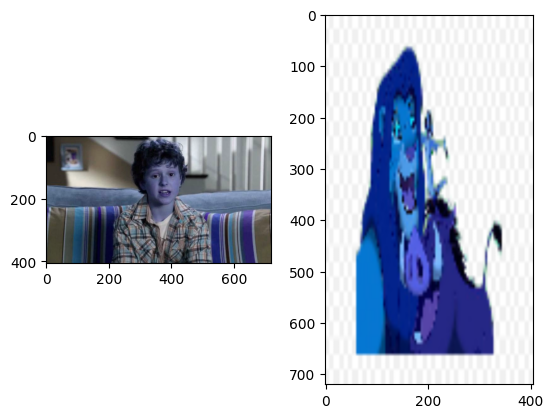

{'PUMBA': 96.26161,
 'SNOW WHITE': 3.684806,
 'TIANA': 0.04440828,
 'MERIDA': 0.0060714846,
 'JASMINE': 0.00093876186}

In [119]:
prediction("Trial_Images/luke.jpg")

1/1 [==============================] - 0s 21ms/step


<Figure size 640x480 with 0 Axes>

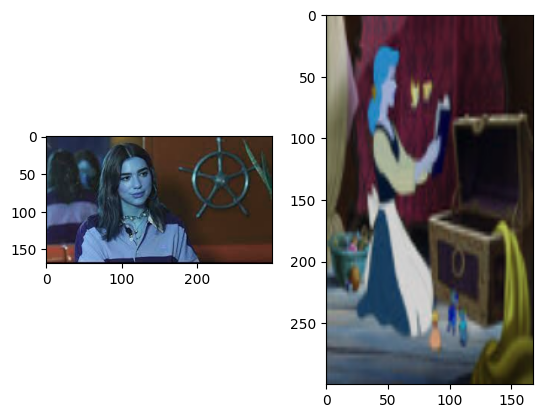

{'CINDERELLA': 99.98214,
 'SNOW WHITE': 0.013476306,
 'RUPONZEL': 0.003182974,
 'PUMBA': 0.00057737523,
 'TIANA': 0.00022992783}

In [120]:
prediction("Trial_Images/dua.jpg")

1/1 [==============================] - 0s 22ms/step


<Figure size 640x480 with 0 Axes>

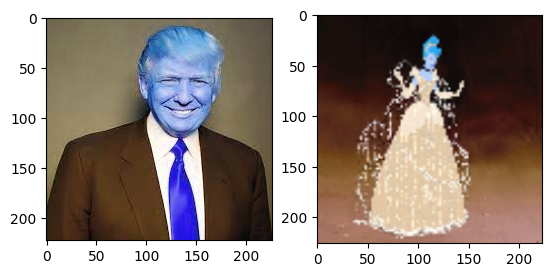

{'CINDERELLA': 69.03997,
 'ELSA': 19.232872,
 'ANNA': 11.1881075,
 'RUPONZEL': 0.5052223,
 'ARURA': 0.01676351}

In [121]:
prediction("Trial_Images/trump.jpg")

1/1 [==============================] - 0s 21ms/step


<Figure size 640x480 with 0 Axes>

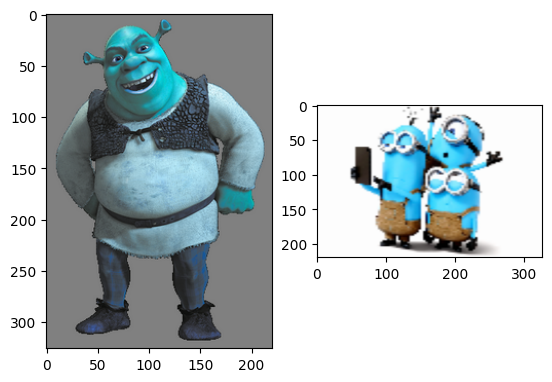

{'MINION': 39.477028,
 'SNOW WHITE': 23.527523,
 'ANNA': 15.420207,
 'PUMBA': 12.29235,
 'CINDERELLA': 5.3100696}

In [122]:
prediction("Trial_Images/shrek.png")

1/1 [==============================] - 0s 22ms/step


<Figure size 640x480 with 0 Axes>

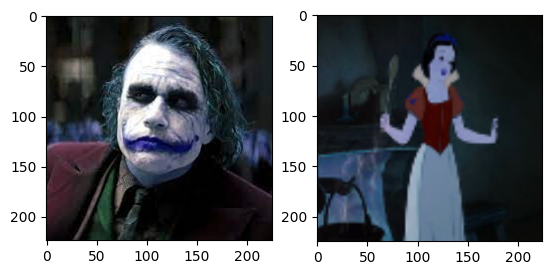

{'SNOW WHITE': 51.083027,
 'MERIDA': 24.955408,
 'MICKEY': 5.819313,
 'ELSA': 4.7589345,
 'OLAF': 3.4649994}

In [123]:
prediction("Trial_Images/joker.jpeg")

1/1 [==============================] - 0s 22ms/step


<Figure size 640x480 with 0 Axes>

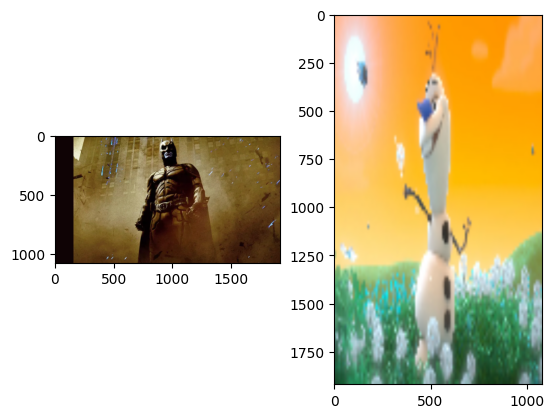

{'OLAF': 43.15637,
 'PUMBA': 28.887829,
 'ELSA': 12.416229,
 'DONALD': 5.7901998,
 'ANNA': 3.8178701}

In [124]:
prediction("Trial_Images/batman.jpg")